# Part I - Ford GoBike Sharing Data Exploration
## by Ezemonye Ordu Omereji



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#explore">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This document contains exploratory analysis of the Ford GoBike Sharing dataset which includes data related to individual rides made in February, 2019 covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [263]:
# import prerequisite packages and set the inline plot property
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [264]:
#load dataset into pd dataframe and view summary statistics
bike_sharing = pd.read_csv('fordgobike_tripdata.csv') #originally 201902-fordgobike-tripdata.csv

In [265]:
# data shape, types and formation
print(bike_sharing.shape)
bike_sharing.info()
bike_sharing.head(10)

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [266]:
#checking for number of null values per feature
bike_sharing.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [267]:
#checking for duplicated values in dataframe
bike_sharing.duplicated().sum()

0

In [268]:
#checking for gender representation
bike_sharing.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [269]:
#checking for member status representation
bike_sharing.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### Observations
> 1. There are 10 columns without null values and 6 columns having a few hundreds and thousands of null values.
> 2. There are no duplicate values
> 3. Males and Subscribers show predominance in the dataset
> 4. start_time and end_time are object types. Datetime types are expected.
> 5. start_station_id, end_station_id are float types. String type is expected
> 6. bike_id is integer. String type expected because no calculations are required with feature
> 7. user_type and member_gender are expected category type but have object types
> 8. trip duration is in seconds
> 9. start_station_latitude, start_station_longitude, end_station_latitude and end_station_longitude appear to be irrelevant to the analysis

### Structure of the dataset

> The data set comprises of 183,412 records of bike trips, with a total of 16 features (duration_sec, start_time, end_time, start_station_id,start_station_name, start_station_latitude,start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type,member_birth_year, member_gender, bike_share_for_all_trip)

### Main feature(s) of interest in the dataset

> My interest points to the features that determine when most rides occur and the factors that affect frequent usage of the bike sharing system.  

### Features in the dataset that will help support the investigation into the feature(s) of interest

> I envisage that time of day and day of the week will likely impact the most on bike sharing occurances while age, gender and member status will most likely have a lesser impact on this occurances.

<a id='wrangling'></a>
## Data Wrangling

In [270]:
# duplicate (copy) dataframe
bike_sharing_copy = bike_sharing.copy()

In [271]:
# fixing multiple incorrect dtypes
# change start_time and end_time to expected datetime type
bike_sharing_copy['start_time'] = pd.to_datetime(bike_sharing_copy['start_time'])
bike_sharing_copy['end_time'] = pd.to_datetime(bike_sharing_copy['end_time'])

print(bike_sharing_copy['start_time'].dtype,bike_sharing_copy['end_time'].dtype) #confirm conversion of dtypes

datetime64[ns] datetime64[ns]


In [272]:
# change start_station_id, end_station_id to string type
bike_sharing_copy['start_station_id'] = bike_sharing_copy['start_station_id'].astype('str')
bike_sharing_copy['end_station_id'] = bike_sharing_copy['end_station_id'].astype('str')

print(bike_sharing_copy['start_station_id'].dtype, bike_sharing_copy['end_station_id'].dtype) #confirm conversion of dtypes

object object


In [273]:
# change bike_id to expected string type
bike_sharing_copy['bike_id'] = bike_sharing_copy['bike_id'].astype('str')

# change user_type and member_gender to expected category type
bike_sharing_copy['user_type'] = bike_sharing_copy['user_type'].astype('category')
bike_sharing_copy['member_gender'] = bike_sharing_copy['member_gender'].astype('category')

# confirm conversion of dtypes
print(bike_sharing_copy['bike_id'].dtype)
print(bike_sharing_copy['user_type'].dtype, bike_sharing_copy['member_gender'].dtype)

object
category category


In [274]:
# checking for period of trips in the entire dataset
start_date_time = bike_sharing_copy['start_time'].min()
end_date_time = bike_sharing_copy['start_time'].max()

period = end_date_time - start_date_time
print(period)

27 days 23:58:57.912000


In [275]:
# checking for duration time of the year
print(bike_sharing_copy['start_time'].max())
print(bike_sharing_copy['start_time'].min())

2019-02-28 23:59:18.548000
2019-02-01 00:00:20.636000


Apparently, all records were in February, 2019.

In [276]:
# drop irrelevant columns with latitudes and longitudes
bike_sharing_copy.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

# confirm drop of columns
bike_sharing_copy.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'end_station_id', 'end_station_name', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

## Feature Engineering

Adding new columns for duration in minutes, ride hour of the day, ride day of the week and age of riders
 * duration_minutes from duration_sec
 * start_hour from start_time
 * day_of_the_week from start_time
 * rider_age from member_birth_year

In [277]:
# convert duration of trips(seconds) to minutes, start trip date to 'yyyy-mm-dd' format, extract daily trip hour time and week day into new columns
bike_sharing_copy['duration_minutes'] = bike_sharing_copy['duration_sec']/60
bike_sharing_copy['start_hour'] = bike_sharing_copy.start_time.dt.strftime('%H')
bike_sharing_copy['day_of_week'] = bike_sharing_copy.start_time.dt.strftime('%A')

In [278]:
bike_sharing_copy.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,start_hour,day_of_week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.750000,17,Thursday
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,708.683333,18,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.900000,12,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.166667,17,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667,23,Thursday


In [279]:
#dropping the duration by seconds column
bike_sharing_copy.drop(['duration_sec'], axis=1, inplace=True)

In [280]:
#checking duration_sec drop
bike_sharing_copy.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_minutes', 'start_hour', 'day_of_week'],
      dtype='object')

In [281]:
#calculating age of each user
bike_sharing_copy['user_age'] = 2019 - bike_sharing_copy['member_birth_year']

In [282]:
bike_sharing_copy['user_age']

0         35.0
1          NaN
2         47.0
3         30.0
4         45.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: user_age, Length: 183412, dtype: float64

In [283]:
#drop NaN rows in dataframe and reset index
bike_sharing_copy = bike_sharing_copy.dropna()
bike_sharing_copy = bike_sharing_copy.reset_index(drop=True)
bike_sharing_copy

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,start_hour,day_of_week,user_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,869.750000,17,Thursday,35.0
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,1030.900000,12,Thursday,47.0
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,608.166667,17,Thursday,30.0
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667,23,Thursday,45.0
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,29.883333,23,Thursday,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,1996.0,Male,No,8.000000,00,Friday,23.0
174948,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,1984.0,Male,No,5.216667,00,Friday,35.0
174949,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,1990.0,Male,Yes,2.350000,00,Friday,29.0
174950,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,1988.0,Male,No,2.316667,00,Friday,31.0


In [284]:
#confirming deletion of null values
bike_sharing_copy.isna().sum()

start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_minutes           0
start_hour                 0
day_of_week                0
user_age                   0
dtype: int64

In [285]:
#checking dtypes
bike_sharing_copy.dtypes

start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
duration_minutes                  float64
start_hour                         object
day_of_week                        object
user_age                          float64
dtype: object

In [286]:
# convert start_hour, day_of_week into ordered categorical types
bike_start_hour = {'start_hour': ['00','01','02','03','04','05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']}
bike_week_day = {'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',]}

# function for ordered categories
def convert_to_cat(cat_):
    for var in cat_:
        ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = cat_[var])
        bike_sharing_copy[var] = bike_sharing_copy[var].astype(ordered_cat)
        
convert_to_cat(bike_start_hour)
convert_to_cat(bike_week_day)

In [287]:
print(bike_week_day)

{'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}


In [288]:
#change dtype for ages from float to int
bike_sharing_copy['user_age'] = bike_sharing_copy['user_age'].astype('int') #change dtype for user_age
print(bike_sharing_copy['user_age'].dtype) #confirm change of dtype

int32


In [289]:
bike_sharing_copy['member_birth_year'] = bike_sharing_copy['member_birth_year'].astype('int')
bike_sharing_copy['member_birth_year'].dtype

dtype('int32')

In [290]:
#clean copy
bike_sharing_clean = bike_sharing_copy.copy()
bike_sharing_clean.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes,start_hour,day_of_week,user_age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No,869.750000,17,Thursday,35
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,1030.900000,12,Thursday,47
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,1989,Other,No,608.166667,17,Thursday,30
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,26.416667,23,Thursday,45
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959,Male,No,29.883333,23,Thursday,60


In [291]:
bike_sharing_clean.describe()

,member_birth_year,duration_minutes,user_age
count,174952.000000,174952.000000,174952.000000
mean,1984.803135,11.733379,34.196865
std,10.118731,27.370082,10.118731
min,1878.000000,1.016667,18.000000
25%,1980.000000,5.383333,27.000000
50%,1987.000000,8.500000,32.000000
75%,1992.000000,13.150000,39.000000
max,2001.000000,1409.133333,141.000000


<a id='explore'></a>
## Exploratory Analysis

### **Univariate Exploration**

> This section is dedicated to investigating distributions of individual variables. 

### What day of the week did most rides occur?

In [292]:
day_counts = bike_sharing_clean['day_of_week'].value_counts().index
day_counts

CategoricalIndex(['Thursday', 'Tuesday', 'Wednesday', 'Friday', 'Monday',
                  'Sunday', 'Saturday'],
                 categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True, dtype='category')

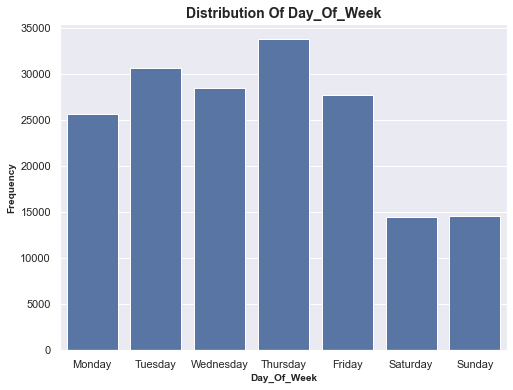

In [293]:
# function to plot count
def count_plot(dataFrame, xVariable, perc): #, yVariable, zVariable):
    
    #set plot dimensions
    plt.figure(figsize=[8, 6])
    
    #set base colour
    base_color = sb.color_palette()[0]
    
    # counting frequency per unique value in member gender 
    day_counts = bike_sharing_clean['day_of_week'].value_counts() #default count is in decreasing order
    day_order = day_counts.index  #unique values of the member gender column 
    
    #plot
    ax = sb.countplot(data=dataFrame, x=xVariable, color=base_color) # order=bike_week_day) #check this
    
    # computing for and adding relative frequency text on bars
    if perc=='yes':
        for i in ax.patches:
            percent_str = '{:.1f}%'.format(100 * i.get_height()/total)
            x = i.get_x() + i.get_width()/2
            y = i.get_height()+.05
            ax.annotate(percent_str, (x, y),ha='center')
    else:
        pass
    
    #add title with formatting
    plt.title(f'''Distribution of {xVariable}'''.title() , fontsize=14, weight='bold')

    #add xlabel with formatting
    plt.xlabel(xVariable.title(), fontsize=10, weight='bold')
    
    #add ylabel with formatting
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')
    
    

    
count_plot(bike_sharing_clean, 'day_of_week', perc='no')

#### For the month of February, 2019, most rides appear to have occured within the week days, apparently due to working periods and then, peaking on Thursdays while weekends of Saturdays and Sundays witnessed lower rides indicating most people were probably off the road system or engaged in other activities not requiring movements. 

### Which user membership type used the system more?

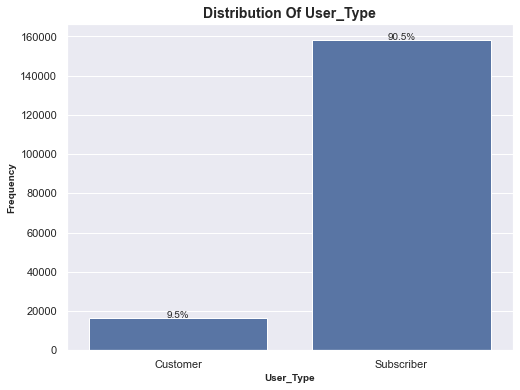

In [294]:
#plot for user membership type
count_plot(bike_sharing_clean, 'user_type', perc='yes')

#### About 158,000 members (90%+) had full subcribers membership while customers were a little less than 20,000 which constituted 9.5% of the whole.

### What gender was patronizing the bike sharing system more frequently?

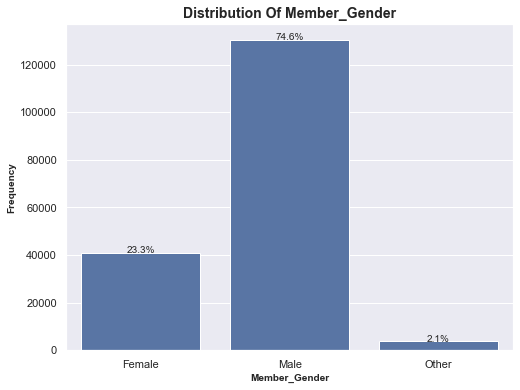

In [295]:
#plot for gender type
count_plot(bike_sharing_clean, 'member_gender', perc='yes')

#### The plot indicates that over 70% of the total rides in February, 2019 were done by Males, followed by females who had about 23% and those who didn't identify as either were less than 3% of the total.

### What hour of the day did most rides start?

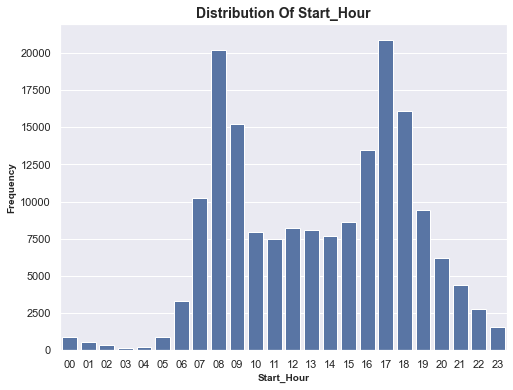

In [296]:
#plot for user membership type
count_plot(bike_sharing_clean, 'start_hour', perc='no')

#### Visually, the plot sees 2 dinstinct peak hours of 8:00 hrs(am) and 17:00 hrs(pm) which can be traced to the rush hour time for work in the morning and closing period for most businesses respectively.

### What Age of Users were patronizing the system more?

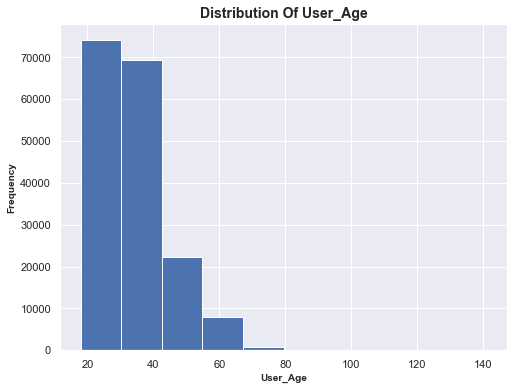

In [297]:
# function for histogram plot
def hist_plot(dFrame, xVar, binsize):
    
    # increase plot area
    fig, ax = plt.subplots(figsize=(8, 6))
    
    if binsize != None:
        
        #applying binsize using numpy's arange function
        bins = np.arange(0, bike_sharing_clean['user_age'].max()+binsize, binsize)
        plt.hist(data = bike_sharing_clean, x = 'user_age', bins = bins) 
    else:
        #plot
        plt.hist(data = bike_sharing_clean, x=xVar)
    
    #add title with formatting
    plt.title(f'''Distribution of {xVar}'''.title() , fontsize=14, weight='bold')

    #add xlabel with formatting
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    
    #add ylabel with formatting
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

hist_plot(bike_sharing_clean, xVar='user_age', binsize=None)

##### The histogram appears not to be visually appealing and requires further investigation.

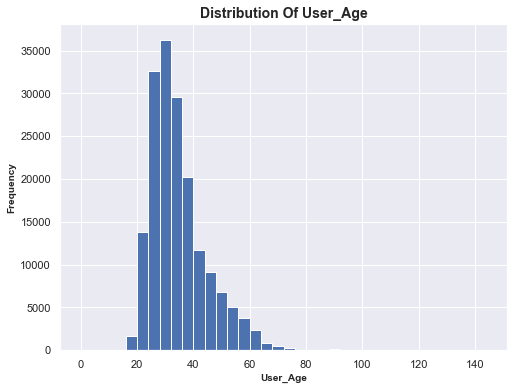

In [298]:
# adding binsize
hist_plot(bike_sharing_clean, xVar='user_age', binsize=4)

#### The right skewed histogram now sheds more light on an average of between 20 and 40 years as the age of most active users, even though the elderly are active withing the bike system. 

### What is the average duration of a bike trip?

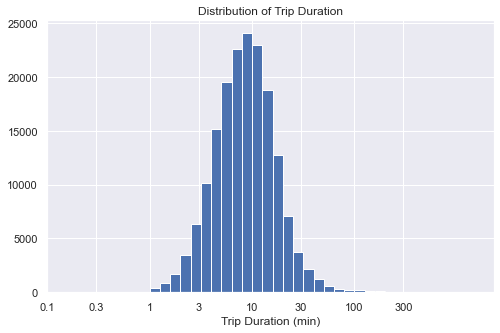

In [299]:
# increasing plot size
plt.figure(figsize=[8, 5])

# plotting to a standard scale using log function with predefined xticks
bins = 10 ** np.arange(0, np.log10(bike_sharing_clean['duration_minutes'].max())+1/10, 1/10)
x_ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in x_ticks]

plt.hist(data = bike_sharing_clean, x = 'duration_minutes', bins = bins)
plt.xscale('log')
plt.xticks(x_ticks, labels)
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration')
plt.show();

#### The histogram appears to be unimodal, pointing average trip duration of between 8 and 10 minutes.

### How many users used the bike_share_for_all_trip?

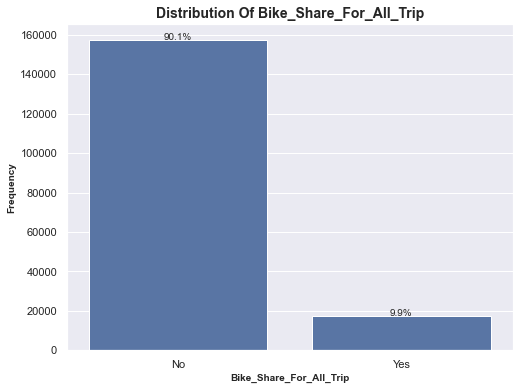

In [300]:
# plot for bike share
count_plot(bike_sharing_clean, 'bike_share_for_all_trip', perc='yes')

### Were there any unusual points? Did you need to perform any transformations?

> The age histogram distribution was vague and bin sizes were increased for a better plot

### Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> A bit of feature engineering was employed to derive day of the week, the ages of users and the hour rides started. data types were changed and the longitude and latitude columns were dropped  after deemed unnecessary.

## Bivariate Exploration

> This section investigates the relationships between pairs of variables as earlier presented. 

## What is the daily usage of the system between customers and subscribers?

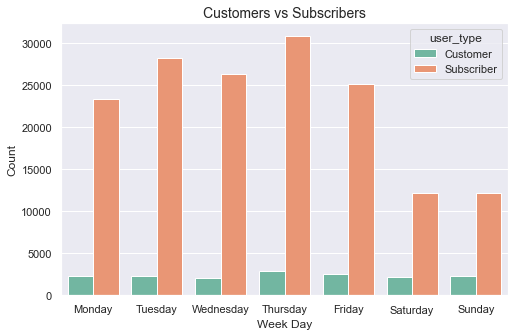

In [301]:
#increase plot size
plt.figure(figsize=[8, 5])
sb.set_theme(style='darkgrid')

# plot relationship between week usage of customers and subscribers
sb.countplot(data=bike_sharing_clean, x='day_of_week', hue='user_type', palette = 'Set2');

plt.title('Customers vs Subscribers', fontsize=14)
plt.xlabel('Week Day');
plt.ylabel('Count')
plt.show();

#### The trend of more week users is replicated in the number of subscribers. No significant effect on the customers.

###  Did time of day have any effect of usage of the system between customers and subscribers?

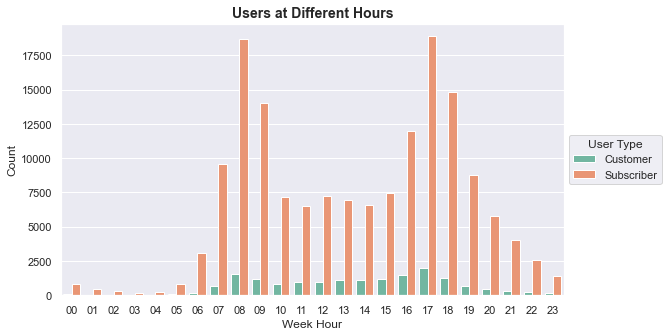

In [302]:
#increase plot size
plt.figure(figsize=[9, 5])
sb.set_theme(style='darkgrid')

# plot relationship between start hour usage of customers and subscribers
sb.countplot(data=bike_sharing_clean, x='start_hour', hue='user_type', palette = 'Set2')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);
plt.title('Users at Different Hours', fontsize=14,  weight='bold')
plt.xlabel('Week Hour');
plt.ylabel('Count')
plt.show;

#### The peak hours are once again visible with customers hardly using the system during late night hours.

### Does age of member affect the duration of rides?

In [ ]:
#increase plot size
plt.figure(figsize=[9, 5])
sb.regplot(data=bike_sharing_clean, x = 'user_age', y = bike_sharing_clean['duration_minutes']/60, 
           x_jitter = 0.8, scatter_kws={'alpha':1/20})

plt.title('Trip Duration by Age of Users', fontsize=14, weight='bold')
plt.xlabel('Age of Users');
plt.ylabel('Trip Hours')
plt.show;

#### The plot also indicates earlier perception of more ride hours between ages 20 and 40, followed by 40 to 50 years. This trend can be traced to average human energy levels at different stages of life.

### What gender had more trips than others?

In [ ]:
# to sample the data, a duration of just 90 minutes(1 hour 30 minutes) is taken which would enable a clear focus
trip_duration = bike_sharing_clean.query("duration_minutes < 60")

# gender and duration plot
base_color = sb.color_palette()[0]
sb.violinplot(data=trip_duration, x='member_gender', y='duration_minutes', color=base_color)
plt.xlabel('Gender')
plt.ylabel('Duration (mins)')
plt.title('Duration vs Gender Type', fontsize=14);

#### Despite having more male users in previous visualization, the median trip appears to be at 10 minutes for women and the other type gender while men was slighly lower.

### How did the feature(s) of interest vary with other features in the dataset?

> * Interestingly, age showed significant effect of ride hours.
> * More males were disposed to using the system than any other gender.
> * People within the age of 20 and 40 were likely to ride more hours than the older ones
> * There are more subscribers than customers

## Multivariate Exploration

### Looking at User type relationship with all variables

In [ ]:
sb.pairplot(bike_sharing_clean, hue='user_type', height=3)
plt.show();

### Does member status affect trip duration during weekdays or weekends more?

In [ ]:
# plot fig size
fig = plt.figure(figsize = [8,6])

# multivariate plot for week days, customer vs subscriber
ax = sb.pointplot(data = bike_sharing_clean, x ='day_of_week', y = 'duration_minutes', hue = 'user_type', palette = 'Reds', linestyles = '', dodge = 0.2)

plt.title('Trip Duration across week days and customer type'.title)
plt.xlabel('Week days')
plt.ylabel('Ride Duration (Minutes)')
plt.ylim(0, 60)
plt.show();

#### Customers tend to embark on longer journeys than subscribers throughourt the week and even more on weekends

### What is the relationship between member age, trip duration and gender?

In [ ]:
#visualizing ride duration based of ages of members
gender = sb.FacetGrid(data=bike_sharing_clean, col='member_gender', 
                     xlim= [10, 80], ylim = [10, 1500])
gender.map(plt.scatter, 'user_age', 'duration_minutes', alpha=0.5)
gender.set_xlabels('Age in (year)')
gender.set_ylabels('Duration in (minutes)')

plt.suptitle('Distribution of trip duration based on gender and age'.title(), 
            y=1, fontsize = 14, weight = 'bold')

#set plot size
gender.fig.set_size_inches(14, 8)
plt.show();

#### Female users within the age of 20 and 37 appear to have had longer trips whereas Male riders between 25 and 45 were having longer trips as compared to their female counterparts. The 'other' gender were fewer with significant people of about 30 and 55 years riding more.

### Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Users who were customers appear to be embarking on more rides than subscribers. These customers spent more time during the weekends than week days. This could be attributed to weekend leisure activities. 

<a id='conclusions'></a>
## Conclusions

> Findings indicated that at rush hours of 8:00hrs and 17:00hrs most week days(mondays - fridays) witnessed the peak in usage of the bike system (Mon-Fri) compared to weekends. While there were frequent rides during the week days, the duration of the rides were shorter than that of the weekends which saw longer ride durations. Apparently, the usage within work days were specific while the weekends appear relaxed and casual. The shorter riders showed to be more of males, while females and other genders appeared to have longer rider durations.

> The active age range for more frequent users of the bike system was between 20 and 40 years of age and as users age increased, rides dropped accordingly.  

> In all, Subscribers were seen to be patronizing the system more than customers.
